## Ajuste de modelos lineales

In [12]:
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [13]:
import scipy

### Generación de datos

In [15]:
def f(x):
    '''
    Returns a sample with instances without noise.
    '''
    y = np.sin(x) * np.exp(-0.1*x) * np.sqrt(x) * np.sin(0.2*x)
    return (y)

In [16]:
def sample(x, f, noise):
    '''
    Returns a sample of 'size' instances with noise
    '''
    mn = np.min(f(x))
    mx = np.max(f(x))
    y = f(x) + pl.randn(x.size)*noise*(mx-mn)
    return (y)    

In [17]:
# Mostrar modelo
xmax = 20
x = np.linspace(0, xmax, 200)
y = f(x)

# DATOS (Simulacion)
xs = np.linspace(0, xmax, 75)
ys = sample(xs, f, .05)

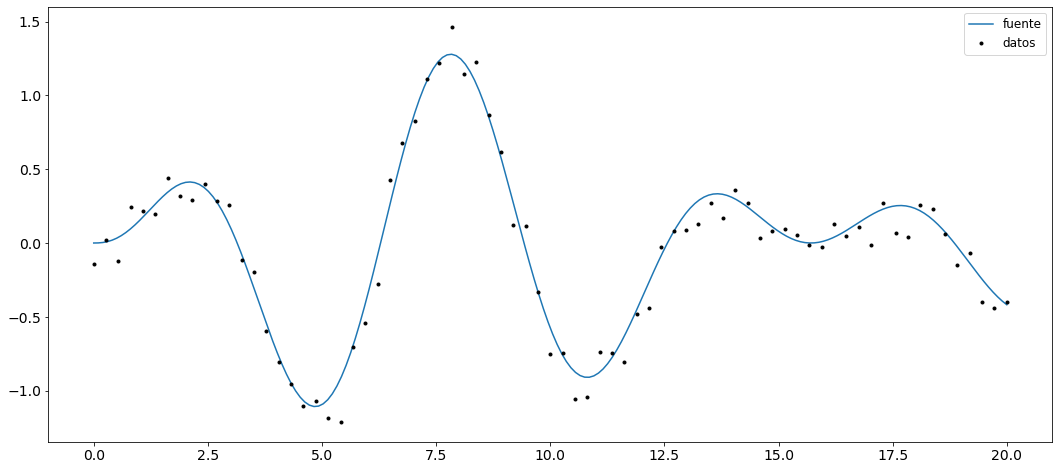

In [18]:
fig = plt.figure(figsize=(18, 8))
pl.plot(x, y, label='fuente')
pl.plot(xs, ys, 'k.', label='datos')
pl.legend()

### método 1: scikit-learn

In [181]:
def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    #model = np.polyfit(x, y, degree)
    model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

In [182]:
def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

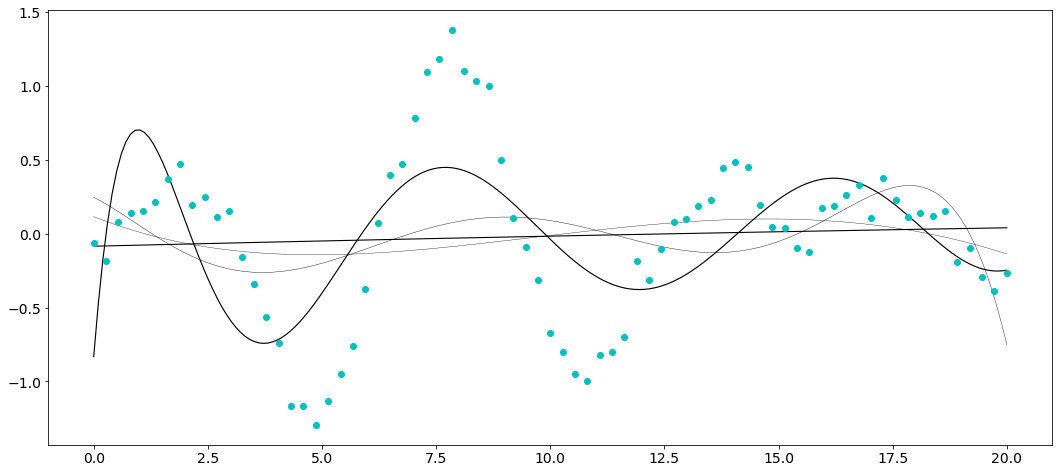

In [184]:
fig = plt.figure(figsize=(18, 8))
for i in range(2,10, 2):
    model = fit_polynomial(xs, ys, i)
    p_y = apply_polynomial(model, x)
    lwd = 0.15 + float(i)/16*6 - 2
    pl.plot(x, p_y, 'k',lw=lwd)
pl.plot(xs, ys, "co")

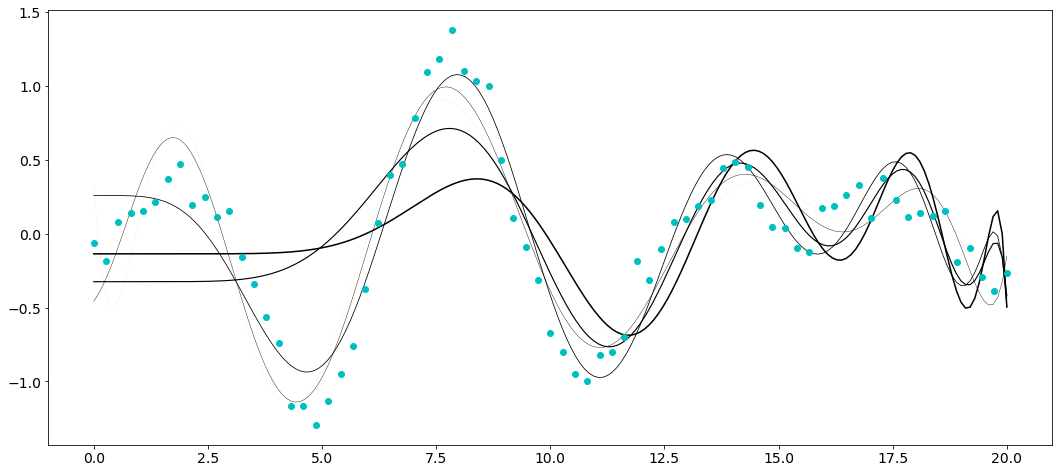

In [185]:
fig = plt.figure(figsize=(18, 8))
for i in range(10,20, 2):
    model = fit_polynomial(xs, ys, i)
    p_y = apply_polynomial(model, x)
    lwd = 0.15 + float(i)/16*3 - 2
    pl.plot(x, p_y, 'k',lw=lwd)
pl.plot(xs, ys, "co")

___

### método 2: numpy

/home/mlares/.virtualenvs/astrometria/lib/python3.8/site-packages/numpy/polynomial/polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


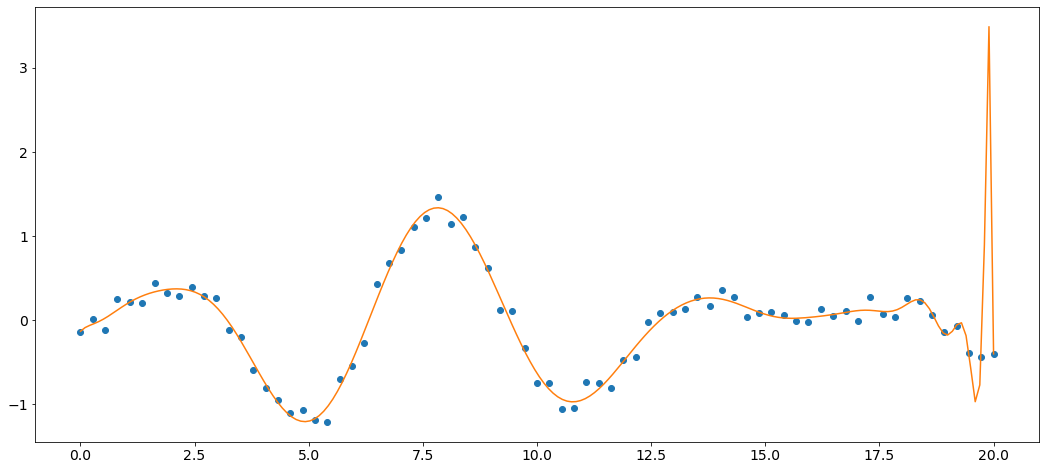

In [24]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 8))
coefs = poly.polyfit(xs, ys, 60)
ffit = poly.polyval(x, coefs)
plt.plot(xs, ys, "o")
plt.plot(x, ffit)

### método 3: scipy

#### a) Filtro

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

In [188]:
#x = np.linspace(0,2*np.pi,100)
#y = np.sin(x) + np.random.random(100) * 0.2
yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

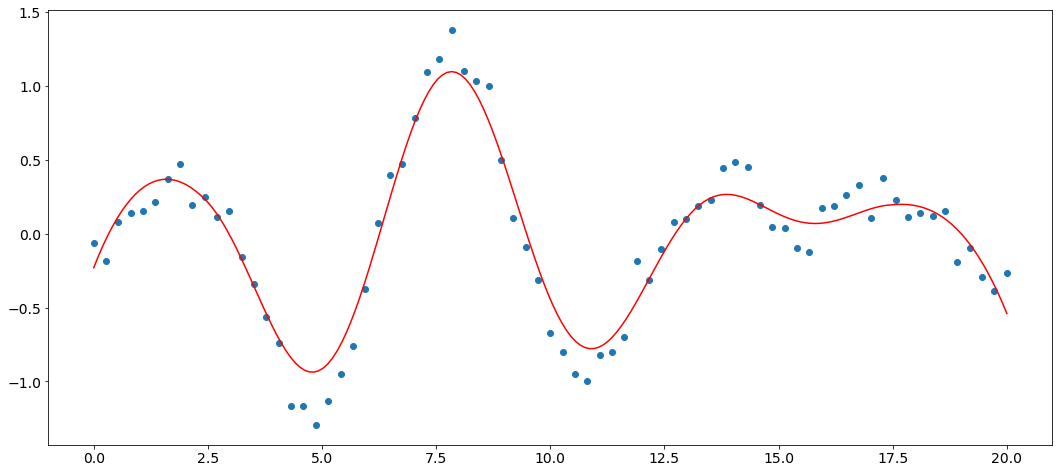

In [190]:
fig = plt.figure(figsize=(18, 8))
plt.scatter(xs, ys)
plt.plot(x, yhat, color='red')

#### b) curve_fit

In [197]:
def func(x, A, B, C, D, E, F):
    return A + B*x + C*x**2 + D*x**3 + E*x**4 + F*x**5

In [198]:
fit, _ = curve_fit(func, xs, ys)
yy_fit = func(x, *fit)

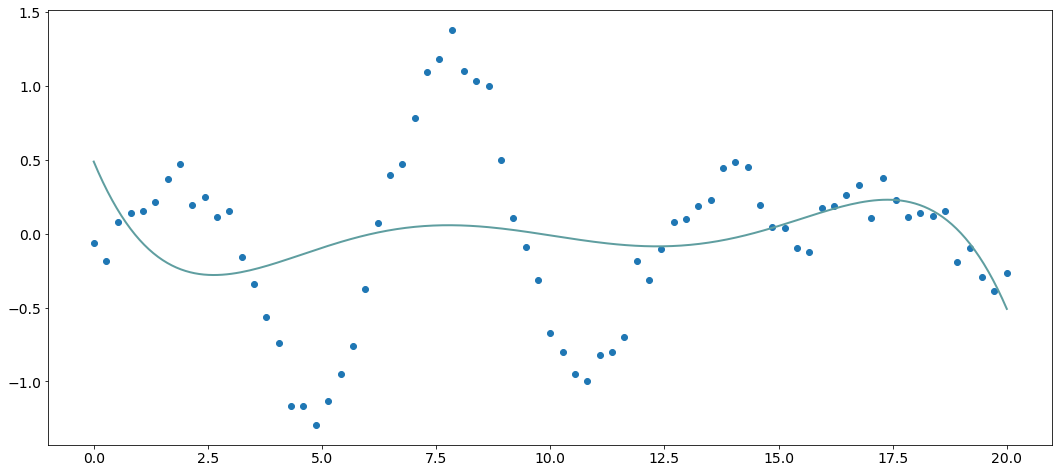

In [200]:
fig = plt.figure(figsize=(18, 8))
plt.scatter(xs, ys)
plt.plot(x, yy_fit, color='cadetblue', lw=2)
plt.show()